In [26]:
import keras
import tensorflow as tf
import dask

In [27]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
import dataset

In [29]:
X, Y = dataset.load_data()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
pokemon_labels = np.array([
    "Normal",
    "Fire",
    "Water",
    "Electric",
    "Grass",
    "Ice",
    "Fighting",
    "Poison",
    "Ground",
    "Flying",
    "Psychic",
    "Bug",
    "Rock",
    "Ghost",
    "Dragon",
    "Dark",
    "Steel",
    "Fairy"])

In [32]:
y = Y[0]
#Type1しか取ってない
x_train = X[0:700]
y_train = y[0:700]
x_test = X[701:]
y_test = y[701:]

In [33]:
img_rows, img_cols = 64,64
img_channels = 4

In [34]:
X_train = x_train.astype('float32') / 255.
X_test = x_test.astype('float32') / 255.

In [35]:
nb_classes = 18 # 正解のパターン数

In [36]:
from keras.utils import np_utils
# クラスベクトルをバイナリクラスの行列に変換する
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [37]:
# backendの違いによる次元数の入力型の調整(おまじない)
from keras import backend as K

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], img_channels, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, img_channels)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)


In [38]:
from keras.layers import Dropout,Flatten,Conv2D,MaxPooling2D

In [39]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu", input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(18, activation='softmax'))

In [40]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop # 最適化手法
model.compile(loss="categorical_crossentropy", # 誤差(損失)関数
             optimizer="Adamax", # 最適化関数
             metrics=["accuracy"] # 評価指標
             )

In [41]:
import time

In [42]:
history = model.fit(X_train, Y_train,
                    batch_size=32,  # 512個ランダムに得る
                    nb_epoch=5, # 試行回数
                    verbose=1,
                    validation_data=(X_test, Y_test))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 700 samples, validate on 100 samples
Epoch 1/5
700/700 [==============================] - 35s 50ms/step - loss: 2.8504 - acc: 0.1286 - val_loss: 2.8779 - val_acc: 0.0900
Epoch 2/5
700/700 [==============================] - 40s 57ms/step - loss: 2.6961 - acc: 0.1486 - val_loss: 2.8166 - val_acc: 0.0900
Epoch 3/5
700/700 [==============================] - 29s 41ms/step - loss: 2.6877 - acc: 0.1500 - val_loss: 2.8116 - val_acc: 0.0900
Epoch 4/5
700/700 [==============================] - 33s 47ms/step - loss: 2.6864 - acc: 0.1443 - val_loss: 2.8229 - val_acc: 0.0900
Epoch 5/5
700/700 [==============================] - 29s 41ms/step - loss: 2.6798 - acc: 0.1471 - val_loss: 2.8095 - val_acc: 0.0900


In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0]) # 損失関数の値
print('Test accuracy:', score[1]) # 精度(98%強)

Test score: 2.809525279998779
Test accuracy: 0.09


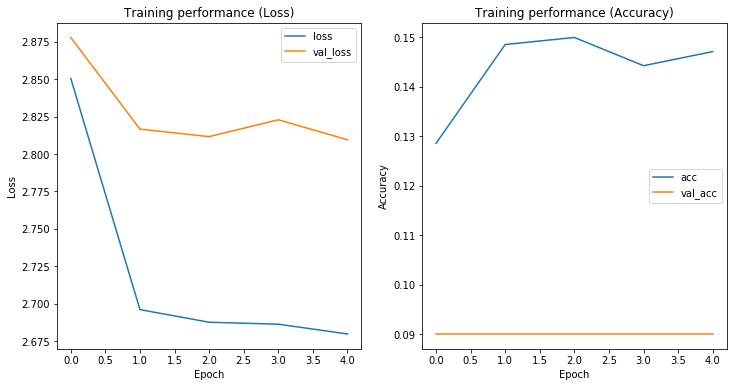

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Training performance (Loss)')
ax[0].plot(history.epoch, history.history['loss'], label='loss')
ax[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].legend()

ax[1].set_title('Training performance (Accuracy)')
ax[1].plot(history.epoch, history.history['acc'], label='acc')
ax[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].legend(loc='best')
#データ足りてなくない